# Yield Analysis of September 3, 2017 North Korean Test Device
*Alan Vitullo,  
Physics Contributor*

![title](poster.jpg)
***

In [1]:
import math
import numpy as np #linear algebra
import pandas as pd #dataframes
import seaborn as sns #stats visual
import geopandas as gpd #geographic dataframes
import geoplot as gplt #geographic visual
import geoplot.crs as gcrs
import matplotlib.pyplot as plt #base plot tool
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
from shapely.geometry import Point
#Python framework for processing seismological data :: QuakeML
import obspy #https://github.com/obspy/obspy/wiki 

## Event 

In [2]:
cat = obspy.read_events('quakeml.xml')
cat

1 Event(s) in Catalog:
2017-09-03T03:30:01.940000Z | +41.343, +129.036 | 6.3 mb | manual

In [114]:
df = pd.DataFrame(
    {'City': ['Punggye-ri'],
     'Country': ['North Korea'],
     'Latitude': [41.343],
     'Longitude': [129.036]})
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
gdf

,City,Country,Latitude,Longitude,Coordinates
0,Punggye-ri,North Korea,41.343,129.036,POINT (129.036 41.343)


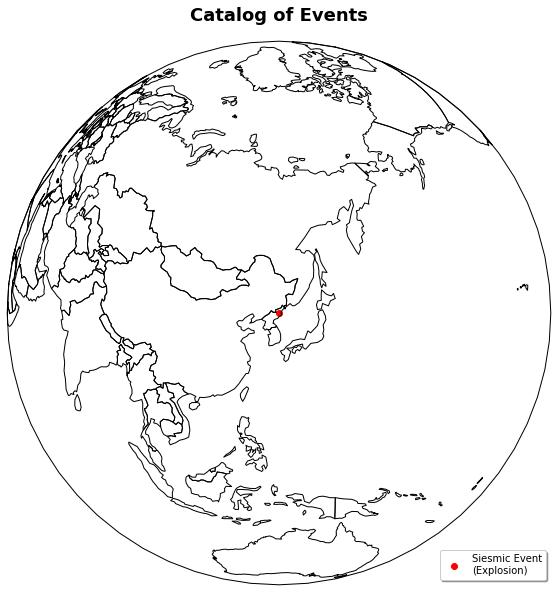

In [115]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gp1 = gplt.polyplot(world, projection=gcrs.Orthographic(central_latitude=41.343, central_longitude=129.036), figsize=(10, 10))
gp1.set_global()
gdf.plot(ax=gp1, color='red', marker='o', label='Siesmic Event\n(Explosion)')
legend = gp1.legend(loc='lower right', shadow=True)
fontdict1 = {'fontsize': 18,
 'fontweight' : 600,
 'verticalalignment': 'baseline'}
gp1.set_title('Catalog of Events', pad=20, fontdict=fontdict1)
gp1.outline_patch.set_visible(True)
plt.savefig('catalog_locations.png')

In [116]:
event = cat[0]
event

Event:	2017-09-03T03:30:01.940000Z | +41.343, +129.036 | 6.3 mb | manual

	            resource_id: ResourceIdentifier(id="quakeml:us.anss.org/event/2000aert")
	             event_type: 'explosion'
	          creation_info: CreationInfo(agency_id='us', agency_uri=ResourceIdentifier(id="smi:anss.org/metadata/agencyid/us"), creation_time=UTCDateTime(2017, 9, 3, 4, 20, 46))
	    preferred_origin_id: ResourceIdentifier(id="quakeml:us.anss.org/origin/2000aert")
	 preferred_magnitude_id: ResourceIdentifier(id="quakeml:us.anss.org/magnitude/2000aert/mb")
	                   ---------
	     event_descriptions: 2 Elements
	                  picks: 188 Elements
	             amplitudes: 1139 Elements
	                origins: 1 Elements
	             magnitudes: 3 Elements
	     station_magnitudes: 1139 Elements

In [117]:
event.event_descriptions

[EventDescription(text='Hamgyong-bukto, North Korea', type='Flinn-Engdahl region'),
 EventDescription(text='22.8 km (14.1 miles) ENE of Sungjibaegam, Yanggang-do, North Korea (pop. 11786)\n39.7 km (24.7 miles) WNW of Hau-ri, Hamgyong-bukto, North Korea (pop. 13581)\n48.7 km (30.2 miles) NNW of Kilju, Hamgyong-bukto, North Korea (pop. 63652)\n54.0 km (33.5 miles) W of Hoemul-li, Hamgyong-bukto, North Korea (pop. 11681)\n72.1 km (44.8 miles) E of Hyesan-si, Yanggang-do, North Korea (pop. 192680)\n', type='nearest cities')]

In [118]:
event.origins

[Origin
	        resource_id: ResourceIdentifier(id="quakeml:us.anss.org/origin/2000aert")
	               time: UTCDateTime(2017, 9, 3, 3, 30, 1, 940000) [confidence_level=90.0, uncertainty=2.04]
	          longitude: 129.036 [confidence_level=90.0, uncertainty=0.0779]
	           latitude: 41.3429 [confidence_level=90.0, uncertainty=0.0522]
	              depth: 0.0 [confidence_level=90.0, uncertainty=1700.0]
	         depth_type: 'operator assigned'
	          method_id: ResourceIdentifier(id="smi:us.anss.org/metadata/methodid/origin/RayLocator/1.0")
	     earth_model_id: ResourceIdentifier(id="smi:us.anss.org/metadata/methodid/earthModel/ak135/1.0")
	            quality: OriginQuality(associated_phase_count=1165, used_phase_count=184, standard_error=1.01, azimuthal_gap=11.0, secondary_azimuthal_gap=14.0, minimum_distance=3.298)
	        origin_type: 'hypocenter'
	 origin_uncertainty: OriginUncertainty(horizontal_uncertainty=6100.0, min_horizontal_uncertainty=8700.0, max_horizontal_

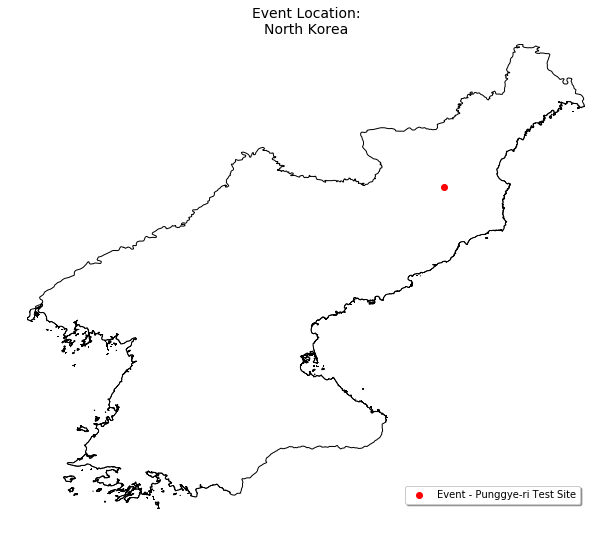

In [119]:
northKorea = gpd.read_file('PRK_adm0.shp')
gp2 = gplt.polyplot(northKorea, figsize=(10,10))
gdf.plot(ax=gp2, color='red', marker='o', label='Event - Punggye-ri Test Site')
legend = gp2.legend(loc='lower right', shadow=True)
fontdict2 = {'fontsize': 14,
 'fontweight' : 550,
 'verticalalignment': 'baseline'}
gp2.set_title('Event Location:\nNorth Korea', pad=10, fontdict=fontdict2)
plt.savefig('event_locations.png')
plt.show()

## Seismology

In [120]:
event.magnitudes[0]

Magnitude
	                     resource_id: ResourceIdentifier(id="quakeml:us.anss.org/magnitude/2000aert/ms_20")
	                             mag: 5.0 [confidence_level=90.0, uncertainty=0.032]
	                  magnitude_type: 'Ms_20'
	                       origin_id: ResourceIdentifier(id="quakeml:us.anss.org/origin/2000aert")
	                       method_id: ResourceIdentifier(id="smi:us.anss.org/metadata/methodid/magnitude/Ms_20/1.0")
	                   station_count: 190
	                 evaluation_mode: 'manual'
	               evaluation_status: 'preliminary'
	                   creation_info: CreationInfo(agency_id='us', agency_uri=ResourceIdentifier(id="smi:anss.org/metadata/agencyid/us"), creation_time=UTCDateTime(2017, 9, 3, 4, 14, 21))
	                            ---------
	 station_magnitude_contributions: 190 Elements

### Magnitude Types
-  __Ms20__ : "A magnitude based on the amplitude of Rayleigh surface waves measured at a period near 20 sec. Waveforms are shaped to the WWSSN LP response. Reported by NEIC, but rarely used as authoritative, since at these magnitudes there is almost always an Mw available. Ms is primarily valuable for large (>6), shallow events, providing secondary confirmation on their size. Ms_20 tends to saturate at about M8.3 or larger." -USGS

In [121]:
event.magnitudes[1]

Magnitude
	                     resource_id: ResourceIdentifier(id="quakeml:us.anss.org/magnitude/2000aert/mb")
	                             mag: 6.3 [confidence_level=90.0, uncertainty=0.02]
	                  magnitude_type: 'mb'
	                       origin_id: ResourceIdentifier(id="quakeml:us.anss.org/origin/2000aert")
	                       method_id: ResourceIdentifier(id="smi:us.anss.org/metadata/methodid/magnitude/mb/1.0")
	                   station_count: 949
	                 evaluation_mode: 'manual'
	               evaluation_status: 'preliminary'
	                   creation_info: CreationInfo(agency_id='us', agency_uri=ResourceIdentifier(id="smi:anss.org/metadata/agencyid/us"), creation_time=UTCDateTime(2017, 9, 3, 4, 14, 19))
	                            ---------
	 station_magnitude_contributions: 949 Elements

-  __Mb__ : "Based on the amplitude of 1st arriving P-waves at periods of about 1 s. Waveforms are shaped to the WWSSN SP response. Reported for most M4.0-4.5 to 6.5 EQs that are observed teleseismically. Only authoritative for global seismicity for which there is no Mww, Mwc, Mwb or Mwr, typically 4.0-5.5 range. Mb tends to saturate at about M 6.5 or larger." -USGS

In [122]:
event.magnitudes[2]

Magnitude
	       resource_id: ResourceIdentifier(id="quakeml:us.anss.org/magnitude/2000aert/mww")
	               mag: 5.2 [confidence_level=90.0, uncertainty=0.066]
	    magnitude_type: 'Mww'
	         origin_id: ResourceIdentifier(id="quakeml:us.anss.org/origin/2000aert")
	         method_id: ResourceIdentifier(id="smi:us.anss.org/metadata/methodid/magnitude/Mww/1.0")
	     station_count: 22
	   evaluation_mode: 'manual'
	 evaluation_status: 'preliminary'
	     creation_info: CreationInfo(agency_id='us', agency_uri=ResourceIdentifier(id="smi:anss.org/metadata/agencyid/us"), creation_time=UTCDateTime(2017, 9, 3, 4, 14, 39))

-  __Mww__ : "Derived from a centroid moment tensor inversion of the W-phase (~50-2000 s; pass band based on size of EQ). Computed for all M5.0 or larger earthquakes worldwide, but generally robust for all M5.5 worldwide. Provides consistent results to M~4.5 within a regional network of high-quality broadband stations. Authoritative USGS magnitude if computed." -USGS

## Data Organization

In [123]:
event.station_magnitudes[0]

StationMagnitude
	            resource_id: ResourceIdentifier(id="quakeml:us.anss.org/stationmagnitude/ta_a21k_bhz_--/ms_20")
	              origin_id: ResourceIdentifier(id="quakeml:us.anss.org/origin/2000aert")
	                    mag: 4.95
	 station_magnitude_type: 'Ms_20'
	           amplitude_id: ResourceIdentifier(id="quakeml:us.anss.org/amp/ta_a21k_bhz_--/ms_20")

In [124]:
esm = event.station_magnitudes

resource_id = []
origin_id = []
mag = []
station_magnitude_type = []
amplitude_id = []

for sm in esm:
    resource_id.append(sm.resource_id)
    origin_id.append(sm.origin_id)
    mag.append(sm.mag)
    station_magnitude_type.append(sm.station_magnitude_type)
    amplitude_id.append(sm.amplitude_id)

magData = {'resource_id':resource_id, 'origin_id':origin_id, 'mag':mag, 
           'station_magnitude_type':station_magnitude_type, 'amplitude_id':amplitude_id }
magnitudes = pd.DataFrame(data=magData)
magnitudes.head(5)

,resource_id,origin_id,mag,station_magnitude_type,amplitude_id
0,quakeml:us.anss.org/stationmagnitude/ta_a21k_b...,quakeml:us.anss.org/origin/2000aert,4.95,Ms_20,quakeml:us.anss.org/amp/ta_a21k_bhz_--/ms_20
1,quakeml:us.anss.org/stationmagnitude/ta_a36m_b...,quakeml:us.anss.org/origin/2000aert,4.81,Ms_20,quakeml:us.anss.org/amp/ta_a36m_bhz_--/ms_20
2,quakeml:us.anss.org/stationmagnitude/ii_aak_bh...,quakeml:us.anss.org/origin/2000aert,5.48,Ms_20,quakeml:us.anss.org/amp/ii_aak_bhz_00/ms_20
3,quakeml:us.anss.org/stationmagnitude/ak_anm_bh...,quakeml:us.anss.org/origin/2000aert,4.77,Ms_20,quakeml:us.anss.org/amp/ak_anm_bhz_--/ms_20
4,quakeml:us.anss.org/stationmagnitude/ii_aru_bh...,quakeml:us.anss.org/origin/2000aert,4.93,Ms_20,quakeml:us.anss.org/amp/ii_aru_bhz_00/ms_20


In [125]:
event.amplitudes[0]

Amplitude
	       resource_id: ResourceIdentifier(id="quakeml:us.anss.org/amp/ta_a21k_bhz_--/ms_20")
	 generic_amplitude: 1.43685e-06
	              type: 'AMS'
	              unit: 'm'
	            period: 19.0
	       time_window: TimeWindow(begin=0.0, end=802.86, reference=UTCDateTime(2017, 9, 3, 3, 48, 31, 119000))
	       waveform_id: WaveformStreamID(network_code='TA', station_code='A21K', channel_code='BHZ', location_code='--')
	      scaling_time: UTCDateTime(2017, 9, 3, 3, 59, 39, 119000)
	    magnitude_hint: 'Ms_20'
	   evaluation_mode: 'automatic'

In [126]:
ea = event.amplitudes

resource_id = []
generic_amplitude = []
amp_type = []
unit = []
period = []
time_window = []
waveform_id = []
scaling_time = []
magnitude_hint = []
evaluation_mode = []

for a in ea:
    resource_id.append(a.resource_id)
    generic_amplitude.append(a.generic_amplitude)
    amp_type.append(a.type)
    unit.append(a.unit)
    period.append(a.period)
    time_window.append(a.time_window)
    waveform_id.append(a.waveform_id)
    scaling_time.append(a.scaling_time)
    magnitude_hint.append(a.magnitude_hint)
    evaluation_mode.append(a.evaluation_mode)

logAmp = []
absLogAmp = []

for ga in generic_amplitude:
    logAmp.append(math.log10(ga))
    absLogAmp.append(abs(math.log10(ga)))
    
ampData = {'resource_id':resource_id, 'generic_amplitude':generic_amplitude, 'type':amp_type,
          'unit':unit, 'period':period, 'time_window':time_window, 'waveform_id':waveform_id,
          'scaling_time':scaling_time, 'magnitude_hint':magnitude_hint, 
           'evaluation_mode':evaluation_mode,'logAmp':logAmp, 'absLogAmp':absLogAmp}

amplitudes = pd.DataFrame(data=ampData)
amplitudes.head(5)

,resource_id,generic_amplitude,type,unit,period,time_window,waveform_id,scaling_time,magnitude_hint,evaluation_mode,logAmp,absLogAmp
0,quakeml:us.anss.org/amp/ta_a21k_bhz_--/ms_20,1.436850e-06,AMS,m,19.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:59:39.119000Z,Ms_20,automatic,-5.842589,5.842589
1,quakeml:us.anss.org/amp/ta_a36m_bhz_--/ms_20,7.848500e-07,AMS,m,19.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T04:07:59.306400Z,Ms_20,automatic,-6.105213,6.105213
2,quakeml:us.anss.org/amp/ii_aak_bhz_00/ms_20,5.986500e-06,AMS,m,18.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:55:35.552200Z,Ms_20,automatic,-5.222827,5.222827
3,quakeml:us.anss.org/amp/ak_anm_bhz_--/ms_20,1.070450e-06,AMS,m,19.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:58:34.591600Z,Ms_20,automatic,-5.970434,5.970434
4,quakeml:us.anss.org/amp/ii_aru_bhz_00/ms_20,1.294600e-06,AMS,m,18.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:59:06.657900Z,Ms_20,automatic,-5.887864,5.887864


### Raw Data

In [127]:
records = magnitudes.merge(amplitudes, how='outer', left_index=True, right_index=True, on='resource_id')
records.head(5)

,resource_id,origin_id,mag,station_magnitude_type,amplitude_id,generic_amplitude,type,unit,period,time_window,waveform_id,scaling_time,magnitude_hint,evaluation_mode,logAmp,absLogAmp
0,quakeml:us.anss.org/stationmagnitude/ta_a21k_b...,quakeml:us.anss.org/origin/2000aert,4.95,Ms_20,quakeml:us.anss.org/amp/ta_a21k_bhz_--/ms_20,1.436850e-06,AMS,m,19.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:59:39.119000Z,Ms_20,automatic,-5.842589,5.842589
1,quakeml:us.anss.org/stationmagnitude/ta_a36m_b...,quakeml:us.anss.org/origin/2000aert,4.81,Ms_20,quakeml:us.anss.org/amp/ta_a36m_bhz_--/ms_20,7.848500e-07,AMS,m,19.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T04:07:59.306400Z,Ms_20,automatic,-6.105213,6.105213
2,quakeml:us.anss.org/stationmagnitude/ii_aak_bh...,quakeml:us.anss.org/origin/2000aert,5.48,Ms_20,quakeml:us.anss.org/amp/ii_aak_bhz_00/ms_20,5.986500e-06,AMS,m,18.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:55:35.552200Z,Ms_20,automatic,-5.222827,5.222827
3,quakeml:us.anss.org/stationmagnitude/ak_anm_bh...,quakeml:us.anss.org/origin/2000aert,4.77,Ms_20,quakeml:us.anss.org/amp/ak_anm_bhz_--/ms_20,1.070450e-06,AMS,m,19.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:58:34.591600Z,Ms_20,automatic,-5.970434,5.970434
4,quakeml:us.anss.org/stationmagnitude/ii_aru_bh...,quakeml:us.anss.org/origin/2000aert,4.93,Ms_20,quakeml:us.anss.org/amp/ii_aru_bhz_00/ms_20,1.294600e-06,AMS,m,18.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:59:06.657900Z,Ms_20,automatic,-5.887864,5.887864


In [128]:
records.sum(axis=0)

mag                  6901.200000
generic_amplitude       0.000634
period               4563.564900
logAmp              -7473.965939
absLogAmp            7473.965939
dtype: float64

In [129]:
records.describe()

,mag,generic_amplitude,period,logAmp,absLogAmp
count,1139.000000,1.139000e+03,1139.000000,1139.000000,1139.000000
mean,6.058999,5.567764e-07,4.006642,-6.561866,6.561866
std,0.579718,1.061541e-06,6.911784,0.485165,0.485165
min,3.560000,1.400000e-09,0.600000,-8.853872,4.879146
25%,5.870000,1.341500e-07,0.850000,-6.872412,6.288220
50%,6.200000,2.462000e-07,0.900000,-6.608712,6.608712
75%,6.450000,5.149750e-07,1.080000,-6.288220,6.872412
max,7.370000,1.320850e-05,22.000000,-4.879146,8.853872


#### *The raw record data suggests a magnitude between 6.058999 and 6.200000

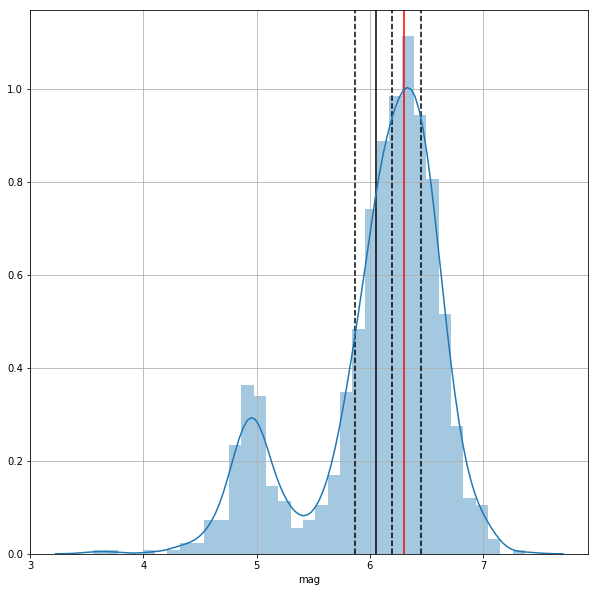

In [130]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.axvline(5.870000, 0,1, color='black', linestyle='--')
plt.axvline(6.200000, 0,1, color='black', linestyle='--')
plt.axvline(6.450000, 0,1, color='black', linestyle='--')
plt.axvline(6.058999, 0,1, color='black')
plt.axvline(6.300000, 0,1, color='red')
sns.distplot(records.mag)
plt.savefig('raw_distplot.png')
plt.show()

#### *Plotting reveals the appearance of two distinct events. 

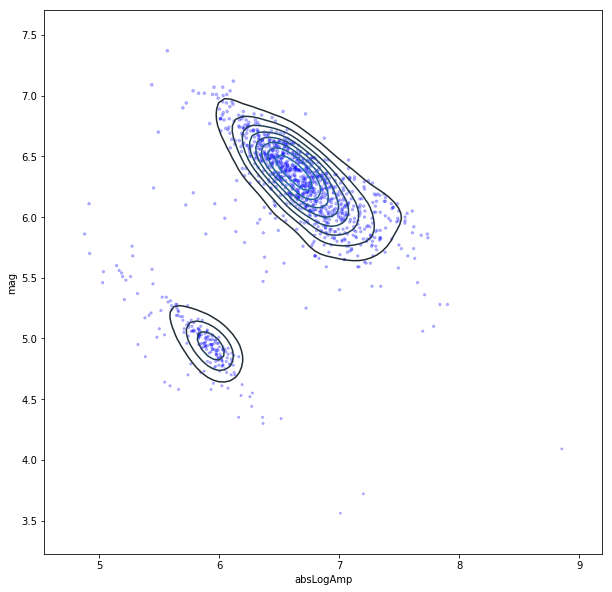

In [131]:
plt.figure(figsize=(10,10))
plt.scatter(records.absLogAmp, records.mag, s=records.mag, c='blue',alpha=0.25)
sns.kdeplot(records.absLogAmp, records.mag)
plt.savefig('raw_scatter.png')
plt.show()

#### *Further plotting reinforces a two event recording. 

### ANSS Picks
https://earthquake.usgs.gov/monitoring/anss/

ANSS analysis seems to confirm this, because their primary focus is monitoring natural geologic event. Their entire pick catalog focuses on the 'secondary' event, which would have been generated by natural aftershocks.

In [132]:
event.picks[0]

Pick
	     resource_id: ResourceIdentifier(id="quakeml:us.anss.org/pick/2000aert/us_3222_bpid-2001851351")
	            time: UTCDateTime(2017, 9, 3, 3, 31, 7, 450000)
	     waveform_id: WaveformStreamID(network_code='IU', station_code='INCN', channel_code='BHZ', location_code='10')
	 evaluation_mode: 'manual'
	   creation_info: CreationInfo(agency_id='us', agency_uri=ResourceIdentifier(id="smi:anss.org/metadata/agencyid/us"), creation_time=UTCDateTime(2017, 9, 3, 3, 37, 9))

In [133]:
resource_id = []
time = []
waveform_id = []
evaluation_mode = []
creation_info = []

for ep in event.picks:
    resource_id.append(ep.resource_id)
    time.append(ep.time)
    waveform_id.append(ep.waveform_id)
    evaluation_mode.append(ep.evaluation_mode)
    creation_info.append(ep.creation_info)

pickData = {'resource_id':resource_id, 'time':time, 'waveform_id':waveform_id, 
            'evaluation_mode':evaluation_mode, 'creation_info':creation_info}
epdf = pd.DataFrame(data=pickData)

picks = epdf.merge(records, how='inner', left_index=True, right_index=True, on='resource_id')
picks.head(5)

,resource_id,time,waveform_id_x,evaluation_mode_x,creation_info,origin_id,mag,station_magnitude_type,amplitude_id,generic_amplitude,type,unit,period,time_window,waveform_id_y,scaling_time,magnitude_hint,evaluation_mode_y,logAmp,absLogAmp
0,quakeml:us.anss.org/pick/2000aert/us_3222_bpid...,2017-09-03T03:31:07.450000Z,"[network_code, station_code, channel_code, loc...",manual,"[agency_id, agency_uri, author, author_uri, cr...",quakeml:us.anss.org/origin/2000aert,4.95,Ms_20,quakeml:us.anss.org/amp/ta_a21k_bhz_--/ms_20,1.436850e-06,AMS,m,19.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:59:39.119000Z,Ms_20,automatic,-5.842589,5.842589
1,quakeml:us.anss.org/pick/2000aert/us_3222_bpid...,2017-09-03T03:30:57.530000Z,"[network_code, station_code, channel_code, loc...",manual,"[agency_id, agency_uri, author, author_uri, cr...",quakeml:us.anss.org/origin/2000aert,4.81,Ms_20,quakeml:us.anss.org/amp/ta_a36m_bhz_--/ms_20,7.848500e-07,AMS,m,19.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T04:07:59.306400Z,Ms_20,automatic,-6.105213,6.105213
2,quakeml:us.anss.org/pick/2000aert/us_1469_4000...,2017-09-03T03:30:57.620000Z,"[network_code, station_code, channel_code, loc...",manual,"[agency_id, agency_uri, author, author_uri, cr...",quakeml:us.anss.org/origin/2000aert,5.48,Ms_20,quakeml:us.anss.org/amp/ii_aak_bhz_00/ms_20,5.986500e-06,AMS,m,18.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:55:35.552200Z,Ms_20,automatic,-5.222827,5.222827
3,quakeml:us.anss.org/pick/2000aert/us_3222_bpid...,2017-09-03T03:31:03.260000Z,"[network_code, station_code, channel_code, loc...",manual,"[agency_id, agency_uri, author, author_uri, cr...",quakeml:us.anss.org/origin/2000aert,4.77,Ms_20,quakeml:us.anss.org/amp/ak_anm_bhz_--/ms_20,1.070450e-06,AMS,m,19.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:58:34.591600Z,Ms_20,automatic,-5.970434,5.970434
4,quakeml:us.anss.org/pick/2000aert/us_3222_bpid...,2017-09-03T03:31:03.030000Z,"[network_code, station_code, channel_code, loc...",manual,"[agency_id, agency_uri, author, author_uri, cr...",quakeml:us.anss.org/origin/2000aert,4.93,Ms_20,quakeml:us.anss.org/amp/ii_aru_bhz_00/ms_20,1.294600e-06,AMS,m,18.0,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:59:06.657900Z,Ms_20,automatic,-5.887864,5.887864


In [134]:
picks.sum(axis=0)

mag                   935.530000
generic_amplitude       0.000358
period               3646.000000
logAmp              -1098.028813
absLogAmp            1098.028813
dtype: float64

In [135]:
picks.describe()

,mag,generic_amplitude,period,logAmp,absLogAmp
count,188.000000,1.880000e+02,188.000000,188.000000,188.000000
mean,4.976223,1.906612e-06,19.393617,-5.840579,5.840579
std,0.304635,1.934700e-06,1.268441,0.305517,0.305517
min,3.560000,6.285000e-08,18.000000,-7.201695,4.879146
25%,4.840000,1.004275e-06,18.000000,-5.998152,5.730123
50%,4.960000,1.281275e-06,19.000000,-5.892362,5.892362
75%,5.082500,1.861563e-06,20.000000,-5.730123,5.998152
max,6.110000,1.320850e-05,22.000000,-4.879146,7.201695


#### *Picks data is drastically different from raw data.

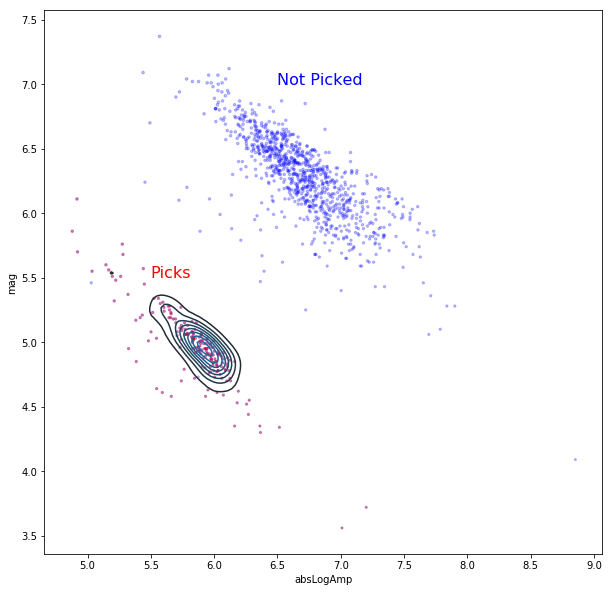

In [136]:
plt.figure(figsize=(10,10))
plt.scatter(records.absLogAmp, records.mag, s=records.mag, c='blue',alpha=0.25)
plt.scatter(picks.absLogAmp,picks.mag, s=picks.mag, c='red',alpha=0.25)
sns.kdeplot(picks.absLogAmp, picks.mag)
plt.text(6.5, 7.0, "Not Picked", size=16, color='blue')
plt.text(5.5, 5.5, "Picks", size=16, color='red')
plt.savefig('picks_scatter.png')
plt.show()

#### *Plotting picks illustrates the need to review the event as two distinct events

## Independant Analysis

### Raw Data Filtering
Errant measurments must be exluded, to determine a faithful representation of yield. Quanaties like wave type, arrival time, magnitude, and others will be used to refine available data to create a reliable model of the event.

In [137]:
time_offset = 1504409600
rstl = []

for rst in records.scaling_time:
    rstl.append(rst.timestamp-time_offset)

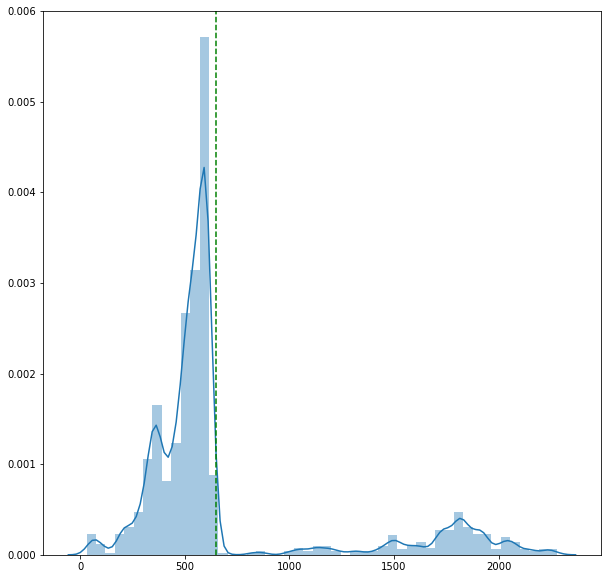

In [138]:
plt.figure(figsize=(10,10))
sns.distplot(rstl)
plt.axvline(650, 0,1, color='green', linestyle='--')
plt.savefig('scaling_time_dist.png')
plt.show()

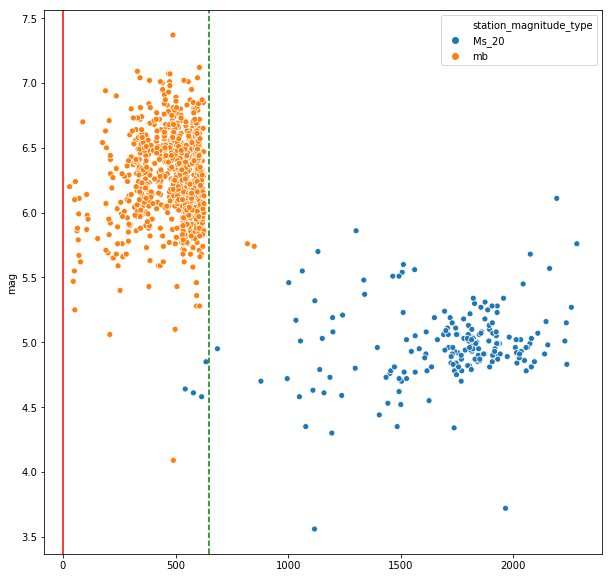

In [139]:
plt.figure(figsize=(10,10))
sns.scatterplot(rstl,records.mag, hue=records.station_magnitude_type)
plt.axvline(0, 0,1, color='red') 
plt.axvline(650, 0,1, color='green', linestyle='--') #650s stat cut-off for timestamp
plt.savefig('event-scaling_time.png')
plt.show()

#### *Plotting suggests to remove contributions below threshold of 650s on scaling time.

In [140]:
ia_rl = []

for index, row in records.iterrows():
    s_time = row.scaling_time.timestamp-time_offset
    if(s_time<650):
        ia_rl.append(row)
        
ia_records = pd.DataFrame(ia_rl)
ia_records.head(5)

,resource_id,origin_id,mag,station_magnitude_type,amplitude_id,generic_amplitude,type,unit,period,time_window,waveform_id,scaling_time,magnitude_hint,evaluation_mode,logAmp,absLogAmp
54,quakeml:us.anss.org/stationmagnitude/hk_hkps_b...,quakeml:us.anss.org/origin/2000aert,4.85,Ms_20,quakeml:us.anss.org/amp/hk_hkps_bhz_00/ms_20,4.120200e-06,AMS,m,21.00,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:43:55.004700Z,Ms_20,automatic,-5.385082,5.385082
134,quakeml:us.anss.org/stationmagnitude/im_pea0b_...,quakeml:us.anss.org/origin/2000aert,4.61,Ms_20,quakeml:us.anss.org/amp/im_pea0b_bhz_--/ms_20,2.565800e-06,AMS,m,22.00,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:42:59.208800Z,Ms_20,automatic,-5.590777,5.590777
135,quakeml:us.anss.org/stationmagnitude/iu_pet_bh...,quakeml:us.anss.org/origin/2000aert,4.58,Ms_20,quakeml:us.anss.org/amp/iu_pet_bhz_00/ms_20,2.179650e-06,AMS,m,21.00,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:43:35.812100Z,Ms_20,automatic,-5.661613,5.661613
187,quakeml:us.anss.org/stationmagnitude/iu_yak_bh...,quakeml:us.anss.org/origin/2000aert,4.64,Ms_20,quakeml:us.anss.org/amp/iu_yak_bhz_00/ms_20,2.843350e-06,AMS,m,20.00,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:42:23.060100Z,Ms_20,automatic,-5.546170,5.546170
190,quakeml:us.anss.org/stationmagnitude/ta_109c_b...,quakeml:us.anss.org/origin/2000aert,6.22,mb,quakeml:us.anss.org/amp/ta_109c_bhz_--/mb,1.396500e-07,AMB,m,0.85,"[begin, end, reference]","[network_code, station_code, channel_code, loc...",2017-09-03T03:42:36.420000Z,mb,automatic,-6.854959,6.854959


In [141]:
ia_records.sum(axis=0)

mag                  5962.660000
generic_amplitude       0.000277
period                958.964900
logAmp              -6372.327093
absLogAmp            6372.327093
dtype: float64

In [142]:
ia_records.describe()

,mag,generic_amplitude,period,logAmp,absLogAmp
count,951.000000,9.510000e+02,951.000000,951.000000,951.000000
mean,6.269884,2.909284e-07,1.008375,-6.700659,6.700659
std,0.336917,3.536827e-07,1.312116,0.375587,0.375587
min,4.090000,1.400000e-09,0.600000,-8.853872,5.385082
25%,6.070000,1.222000e-07,0.840000,-6.912929,6.467660
50%,6.290000,2.037000e-07,0.900000,-6.691009,6.691009
75%,6.490000,3.406750e-07,0.980000,-6.467660,6.912929
max,7.370000,4.120200e-06,22.000000,-5.385082,8.853872


#### *Filtered records suggest a magnitude between 6.269884 and 6.290000

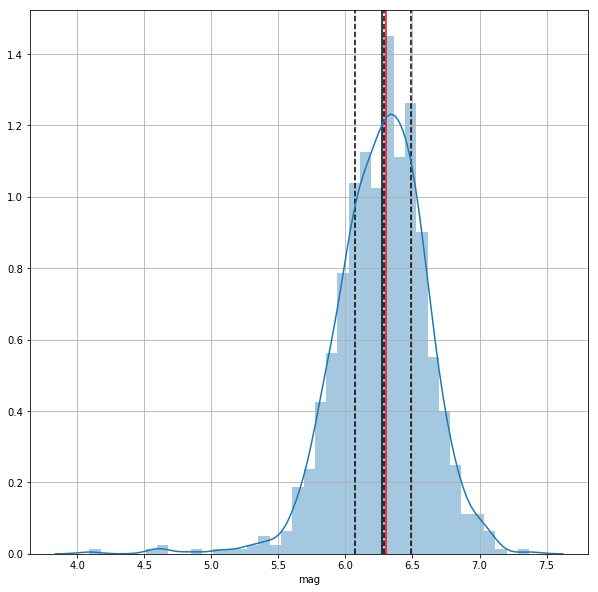

In [143]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.axvline(6.070000, 0,1, color='black', linestyle='--')
plt.axvline(6.290000, 0,1, color='black', linestyle='--')
plt.axvline(6.490000, 0,1, color='black', linestyle='--')
plt.axvline(6.269884, 0,1, color='black')
plt.axvline(6.300000, 0,1, color='red')
sns.distplot(ia_records.mag)
plt.savefig('filtered_distplot.png')
plt.show()

#### *A tigher, single peak, distribution is more desireable for seismic yeild analysis. 

### Event Modeling

In [144]:
iasctr = ia_records.sort_values(by=['scaling_time'])

ias_mag = []
ias_absLogAmp = []
ias_scaling_time = []
st_offset = 0;

for index, row in iasctr.iterrows():
    st_offset = row.scaling_time.timestamp-1504409000
    if(st_offset<1300):
        ias_mag.append(row.mag)
        ias_absLogAmp.append(row.absLogAmp)
        ias_scaling_time.append(st_offset)

ias_data = {'scaling_time':ias_scaling_time, 'mag':ias_mag, 'absLogAmp':ias_absLogAmp}

ias_record = pd.DataFrame(ias_data)

ias_record.head(5)

,scaling_time,mag,absLogAmp
0,629.640,6.20,5.784600
1,645.965,5.47,6.365221
2,651.090,5.55,6.394264
3,652.240,6.10,5.721875
4,652.870,5.25,6.723538


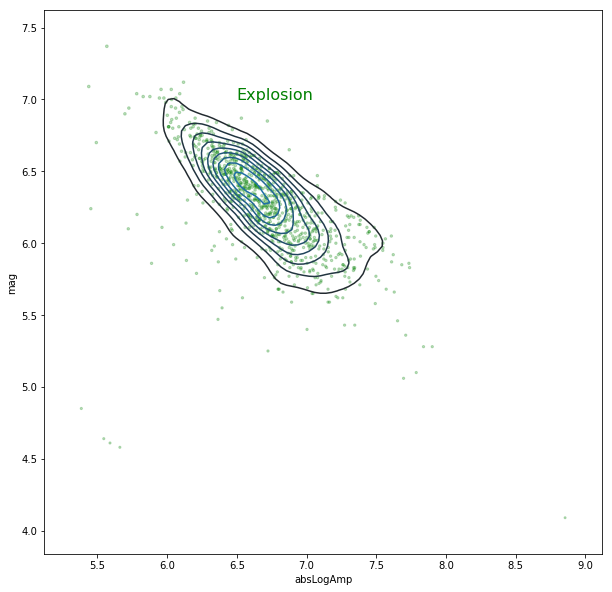

In [145]:
plt.figure(figsize=(10,10))
plt.scatter(ias_record.absLogAmp,ias_record.mag, s=ias_record.mag, c='green',alpha=0.25)
sns.kdeplot(ias_record.absLogAmp, ias_record.mag)
plt.text(6.5, 7.0, "Explosion", size=16, color='green')
plt.savefig('filtered_kdelt.png')
plt.show()

In [147]:
ias_record.describe()

,scaling_time,mag,absLogAmp
count,951.000000,951.000000,951.000000
mean,1093.326726,6.269884,6.700659
std,121.902966,0.336917,0.375587
min,629.640000,4.090000,5.385082
25%,1023.367500,6.070000,6.467660
50%,1131.070000,6.290000,6.691009
75%,1192.372500,6.490000,6.912929
max,1235.004700,7.370000,8.853872


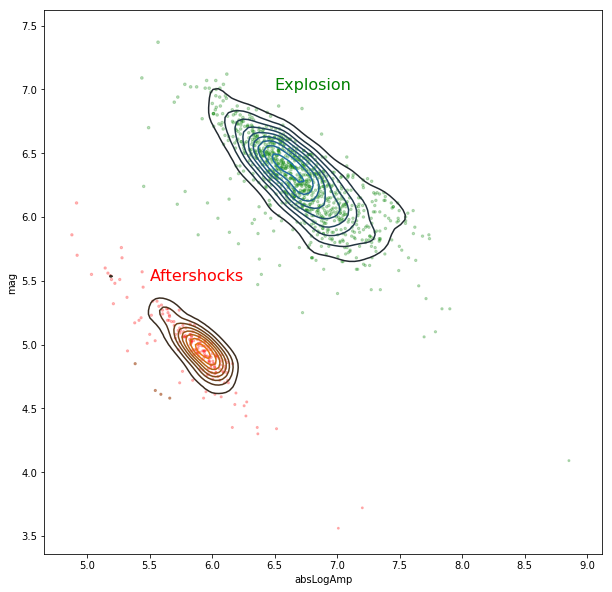

In [146]:
plt.figure(figsize=(10,10))
plt.scatter(ias_record.absLogAmp,ias_record.mag, s=ias_record.mag, c='green',alpha=0.25)
sns.kdeplot(ias_record.absLogAmp, ias_record.mag)
plt.text(6.5, 7.0, "Explosion", size=16, color='green')
plt.scatter(picks.absLogAmp,picks.mag, s=picks.mag, c='red',alpha=0.25)
sns.kdeplot(picks.absLogAmp, picks.mag)
plt.text(5.5, 5.5, "Aftershocks", size=16, color='red')
plt.savefig('ia_comparison.png')
plt.show()

### Yield Analysis
A back of the envelope calculation sugests between 125-450kt as a reasonable range of yield, and a statisticaly probable value of 215kt. We will see later on that this is an underestimate because skewing from aftershocks.
#### Formulas
Analysis revealed the relationship; ___M = A + B log Y + bias correction___, to estimate yield from seismic recordings. 

M: (Event magnitude)

A: =4.1 (1kt magnitude explosion)

B: =.74 (Slope)

bc: =[0, 0.4]

#### Raw Yield
_Bias correction set to 0.2325, based on observations X._

In [149]:
M_raw = 6.058999 
A = 4.1 
B = .74
bc = np.linspace(0.0, 0.4,100)

x = (M_raw-A-bc)/B
y_raw = 10**x
y_raw

array([443.91103995, 438.36506927, 432.88838678, 427.48012683,
       422.13943458, 416.86546589, 411.65738715, 406.51437516,
       401.43561703, 396.42031   , 391.46766134, 386.57688825,
       381.74721767, 376.97788624, 372.26814011, 367.61723485,
       363.02443535, 358.48901565, 354.01025889, 349.58745716,
       345.21991139, 340.90693123, 336.64783499, 332.44194945,
       328.28860985, 324.18715969, 320.13695071, 316.13734272,
       312.18770355, 308.28740891, 304.43584232, 300.632395  ,
       296.87646577, 293.16746098, 289.50479438, 285.88788703,
       282.31616726, 278.78907051, 275.30603929, 271.86652308,
       268.46997821, 265.11586783, 261.80366178, 258.53283655,
       255.30287513, 252.11326701, 248.96350802, 245.85310033,
       242.78155229, 239.74837841, 236.75309927, 233.79524144,
       230.87433739, 227.98992545, 225.1415497 , 222.32875993,
       219.55111154, 216.80816551, 214.09948827, 211.4246517 ,
       208.78323301, 206.17481469, 203.59898446, 201.05

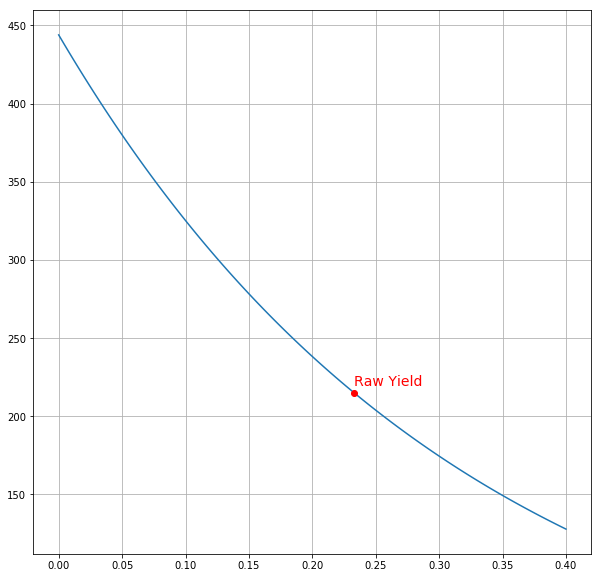

In [157]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(bc,y_raw)
plt.plot(.2325,215, 'ro')
plt.text(.2325,220, "Raw Yield", size=14, color='red')
plt.savefig('raw_yield.png')
plt.show()

#### IA Yield

In [151]:
M_ia = 6.269884

x = (M_ia-A-bc)/B
y_ia = 10**x
y_ia

array([855.60965306, 844.92015535, 834.3642061 , 823.94013685,
       813.64629996, 803.48106838, 793.44283539, 783.53001435,
       773.74103842, 764.07436036, 754.52845224, 745.10180525,
       735.79292939, 726.6003533 , 717.522624  , 708.55830666,
       699.70598437, 690.96425794, 682.33174563, 673.807083  ,
       665.38892263, 657.07593394, 648.86680298, 640.7602322 ,
       632.75494029, 624.84966191, 617.04314756, 609.33416334,
       601.72149076, 594.20392655, 586.7802825 , 579.44938521,
       572.21007595, 565.06121049, 558.00165886, 551.03030523,
       544.14604771, 537.34779817, 530.63448207, 524.0050383 ,
       517.45841901, 510.99358943, 504.60952774, 498.30522487,
       492.07968435, 485.93192218, 479.86096663, 473.86585812,
       467.94564908, 462.09940374, 456.32619805, 450.62511948,
       444.99526693, 439.43575054, 433.94569157, 428.52422226,
       423.17048568, 417.88363563, 412.66283646, 407.50726296,
       402.41610026, 397.38854363, 392.42379841, 387.52

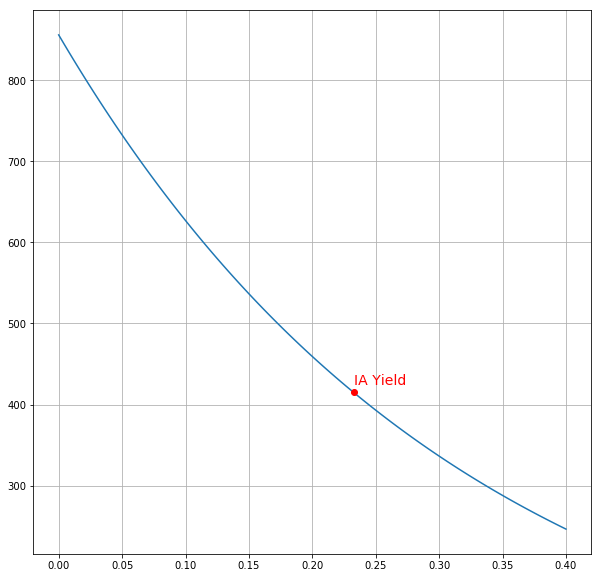

In [160]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.plot(bc,y_ia)
plt.plot(.2325,415,'ro')
plt.text(.2325,425, "IA Yield", size=14, color='red')
plt.savefig('ia_yield.png')
plt.show()

## Result
The proper magnitude measured at the site is estimated to be 6.3. This corresponds to a yield range of 250-850kt. The most likely actual yield is 415kt based on geologic conditions. 

## Acknowledgements
This document contains no RD. This document is not official. No cited agencies participated in the creation of this document. 